In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
PLOT_COLOR = "#61cbf4"

# Ablation results for rank 2 CITE-seq model

In [3]:
cite_results = pd.read_csv("../data/rank_2_cite_model_ablation_scores.csv", index_col=0).sort_values(by="score", ascending=False)
cite_results

,model,score
20,default_model,0.847722
18,linear_recurrent,0.846654
22,cos_blend,0.846624
16,no_dropout,0.846573
14,two_fc_blocks,0.846552
13,one_fc_block,0.846490
19,no_recurrent,0.846426
21,mse_blend,0.846330
4,no_lgbm_1,0.846308
15,normal_dropout,0.846243


In [4]:
cite_readable_names = {
    'no_lgbm_and_raw': "No LGBM predictions, no raw inputs",
    'cos_blend': "No MSE-loss model",
    'no_lgbm': "No LGBM predictions",
    'mse_blend': "No cosine loss model",
    'relu_activation': "ReLU activation / swish",
    'no_lgbm_4': "No 4th LGBM predictions",
    'fc_width_500': "FC width 500 / 1500",
    'no_preprocessed_expression_data': "No preprocessed expression data",
    'fc_width_1000': "FC width 1000 / 1500",
    'lstm_recurrent': "LSTM block / Bidirectional GRU",
    'no_day_corrected_data': "No day-corrected data",
    'no_lgbm_2': "No 2nd LGBM predictions",
    'no_raw_data_with_selected_features': "No raw data with selected features",
    'no_lgbm_3': "No 3rd LGBM predictions",
    'no_raw_data_pca': "No raw data PCA",
    'normal_dropout': "Simple dropout / Gaussian",
    'no_lgbm_1': "No 1st LGBM predictions",
    'no_recurrent': "No recurrent block",
    'one_fc_block': "1 FC block / 3",
    'two_fc_blocks': "2 FC blocks / 3",
    'no_dropout': "No dropout / Gaussian",
    'linear_recurrent': "Linear layer / Bidirectional GRU",
    'default_model': "Default model",
}

In [5]:
cite_results["model"] = cite_results["model"].map(cite_readable_names)

In [6]:
cite_results = cite_results.sort_values("score", ascending=True)

/var/folders/p9/74j47tdn36n6s2vcv_5079q0s4wk4h/T/ipykernel_51857/3295027037.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(yticks)


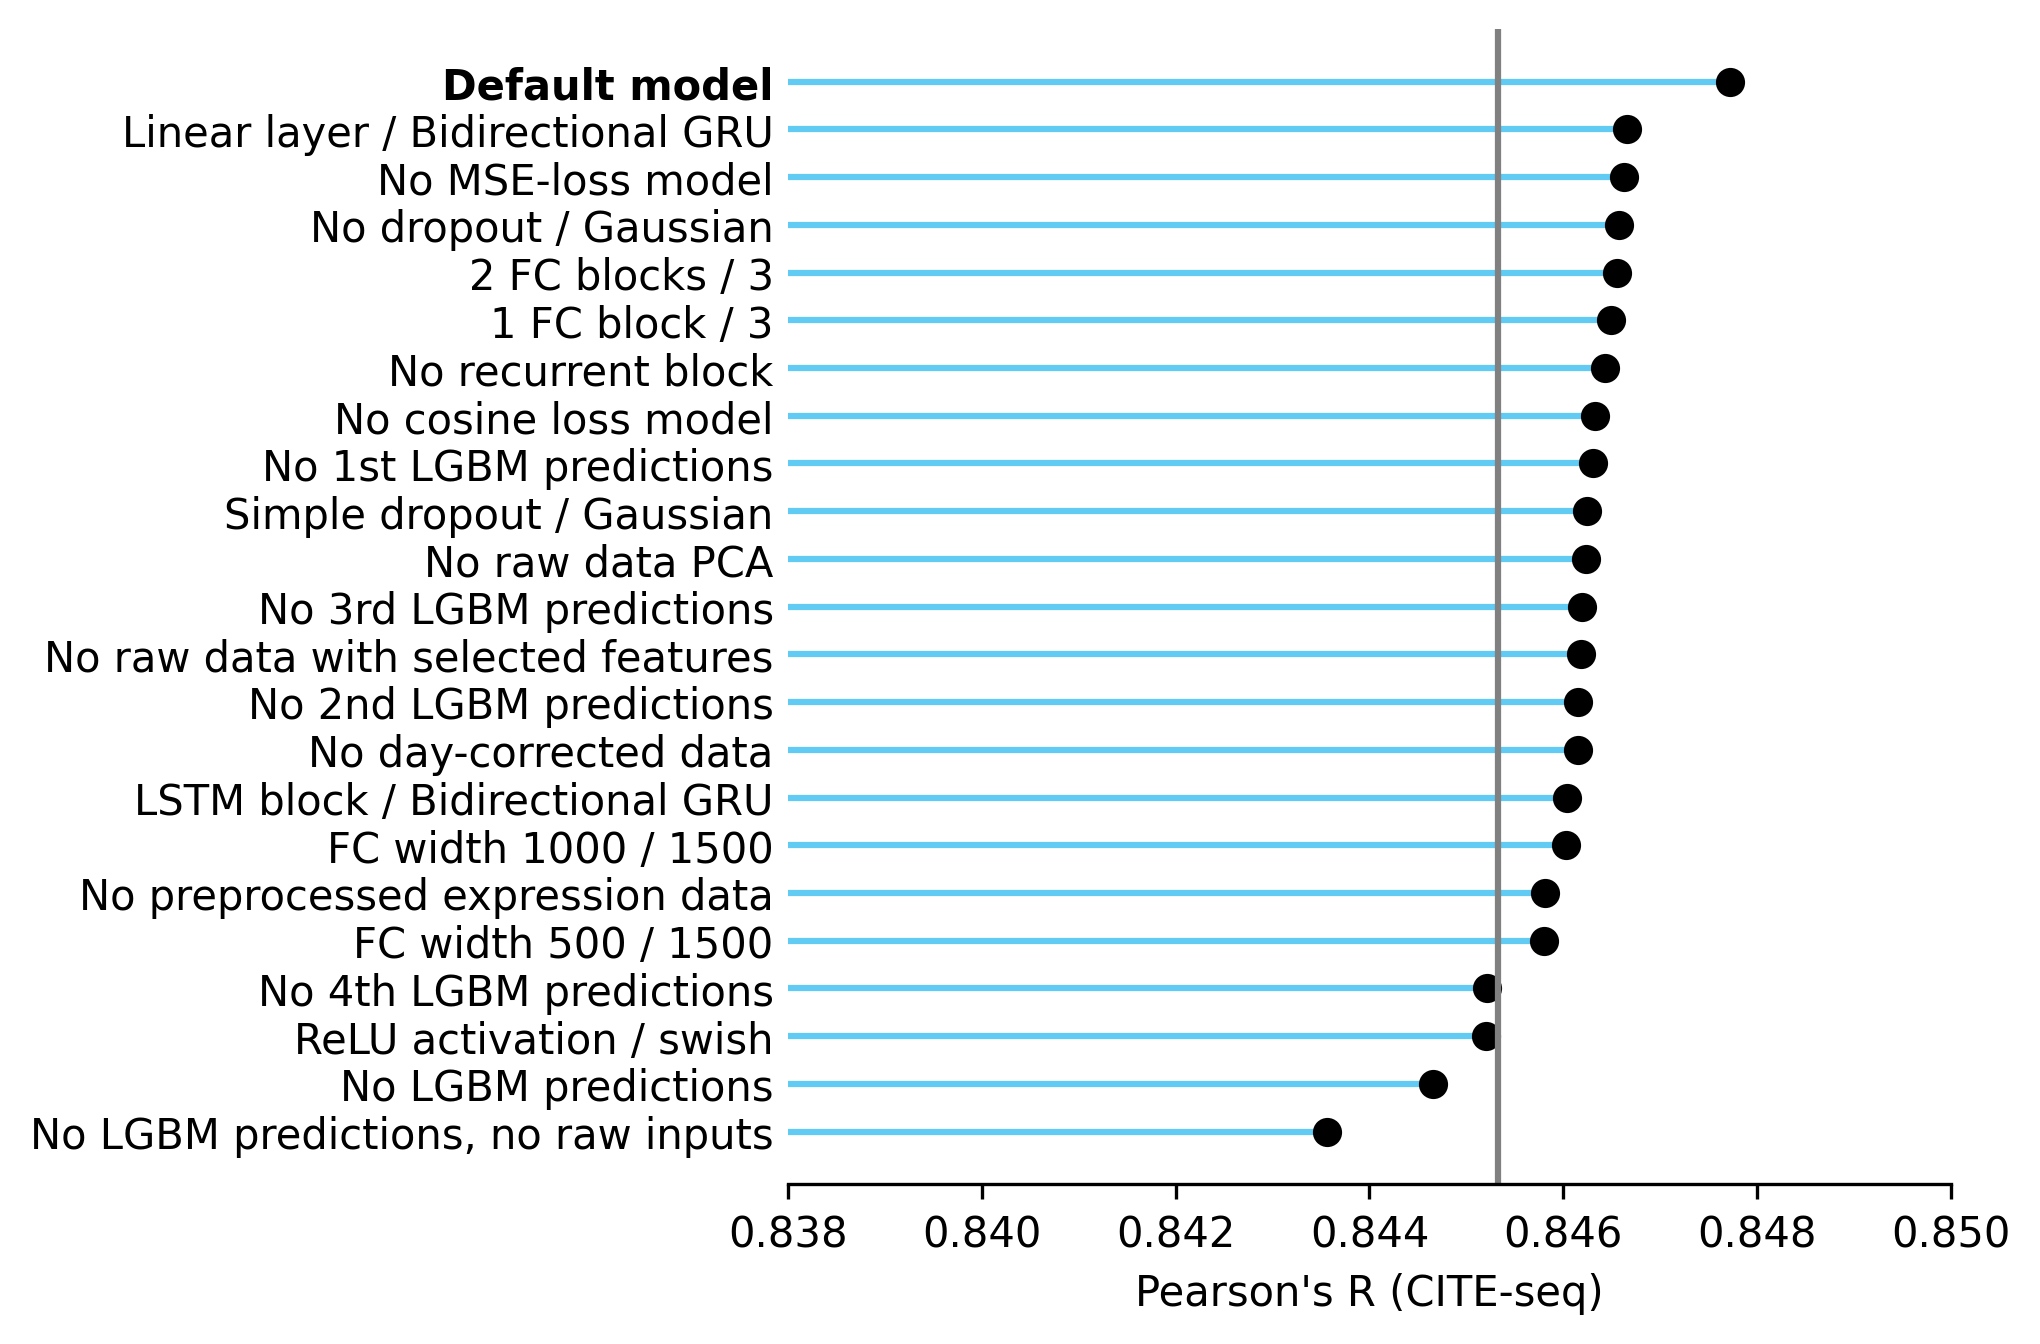

In [7]:
second_best_score = 0.845327

plt.figure(dpi=300, figsize=(5, 5))
markerline, stemlines, baseline = plt.stem(cite_results["model"], cite_results["score"], orientation="horizontal")
plt.setp(markerline, color="black")
plt.setp(stemlines, color=PLOT_COLOR)

# Remove spines and ticks
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().yaxis.set_tick_params(length=0)

# Make "Default model" bold in yticks
yticks = plt.gca().get_yticklabels()
for tick in yticks:
    if tick.get_text() == "Default model":
        tick.set_weight("bold")
plt.gca().set_yticklabels(yticks)

plt.xlim(0.838, 0.850)  # Same as Fig. 2e 
plt.xlabel("Pearson's R (CITE-seq)")

ylim = plt.gca().get_ylim()
plt.vlines(second_best_score, ylim[0], ylim[1], color="gray", linestyle="-")
plt.ylim(ylim[0], ylim[1])

plt.savefig("../figures/Fig_3_f_Rank_2_cite_seq_model_ablations.pdf", bbox_inches="tight")

# Ablation results for rank 1 multiome model

In [8]:
multiome_results = pd.read_csv("../data/rank_1_multiome_model_ablation_scores.csv", index_col=0)
multiome_results

,model,score
0,default_model,0.578193
1,decoder_depth_1,0.576332
2,decoder_depth_3,0.576902
3,width_1024,0.576261
4,activation_relu,0.577929
5,batch_norm,0.578124
6,no_norm,0.576300
7,no_mse,0.578193
8,no_second_head,0.578193
9,no_first_head,0.577927


In [9]:
multiome_readable_names = {
    "default_model": "Default model",
    "decoder_depth_1": "Decoder depth 1 / 5",
    "decoder_depth_3": "Decoder depth 3 / 5",
    "width_1024": "FC width 1024 / 2048",
    "activation_relu": "Activation ReLU / GELU" ,
    "batch_norm": "Batch normalization / layer",
    "no_norm": "No normalization / layer",
    "no_mse": "No MSE loss",
    "no_second_head": "No 2nd head",
    "no_first_head": "No 1st head",
    "no_first_head_decoder_depth_1": "No 1st head, decoder depth 1 / 5",
    "no_first_head_no_mse_decoder_depth_1": "No 1st head, no MSE loss, decoder depth 1 / 5",
    "no_first_head_no_mse": "No 1st head, no MSE loss",
    "no_input_median_div": "No input median division",
    "no_target_median_div": "No target median division",
}

In [10]:
multiome_results["model"] = multiome_results["model"].map(multiome_readable_names)

In [11]:
multiome_results = multiome_results.sort_values("score", ascending=True)

/var/folders/p9/74j47tdn36n6s2vcv_5079q0s4wk4h/T/ipykernel_51857/2078327348.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(yticks)


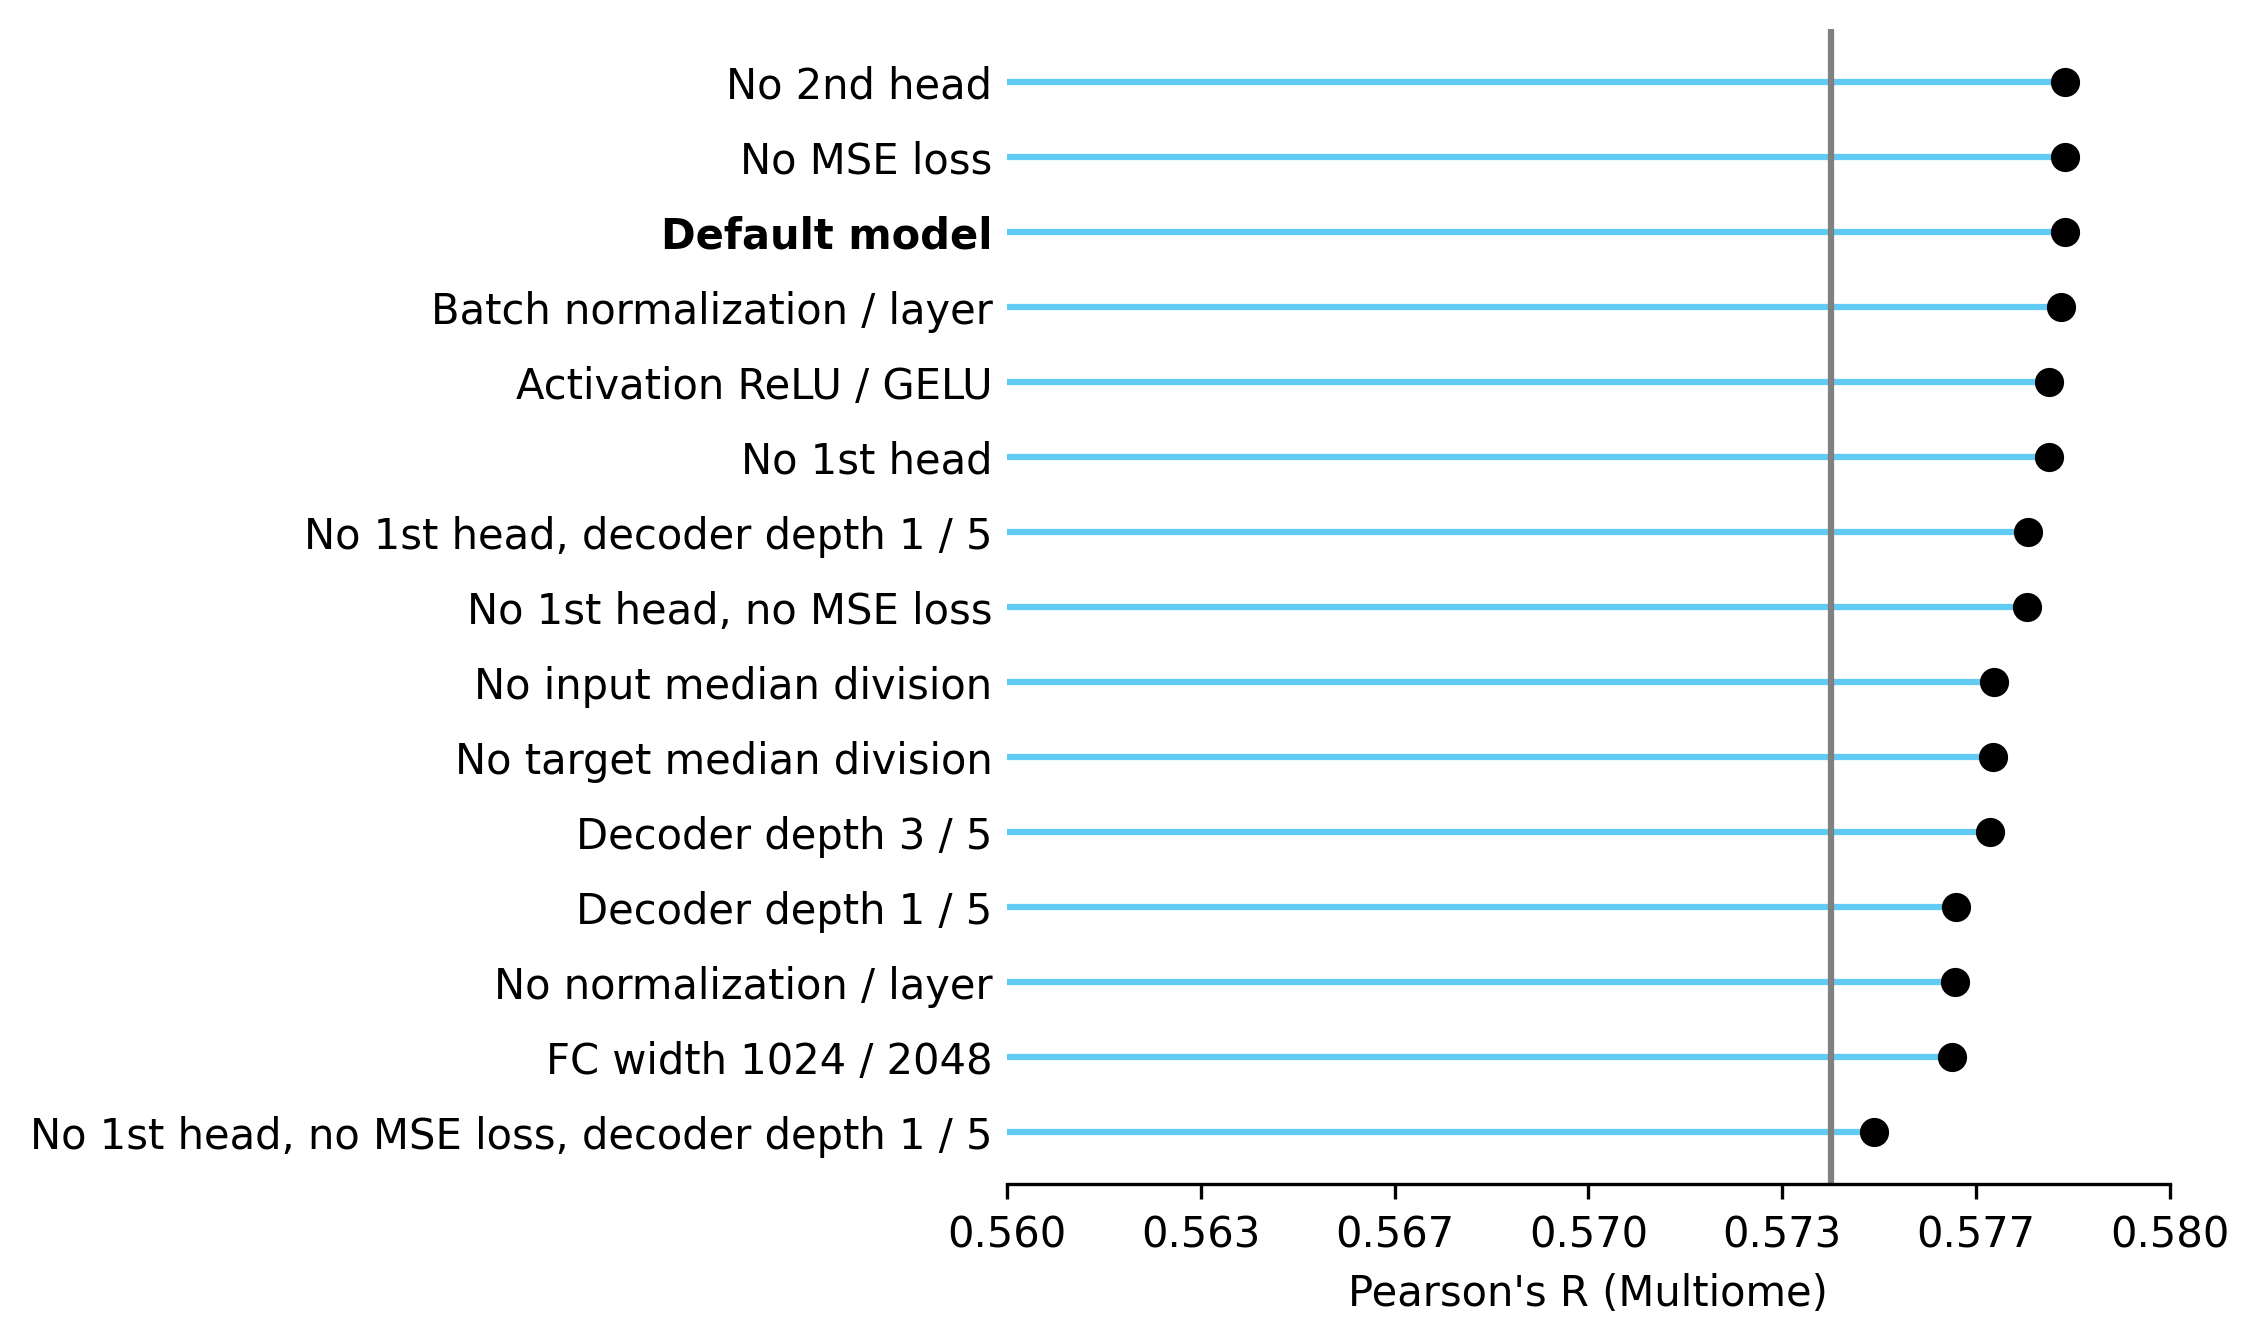

In [13]:
second_best_score = 0.57418

plt.figure(dpi=300, figsize=(5, 5))
markerline, stemlines, baseline = plt.stem(multiome_results["model"], multiome_results["score"], orientation="horizontal")
plt.setp(markerline, color="black")
plt.setp(stemlines, color=PLOT_COLOR)

# Remove spines and ticks
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().yaxis.set_tick_params(length=0)

plt.xlim(0.56, 0.58)  # Same as scores range in Fig. 2d 
plt.xlabel("Pearson's R (Multiome)")

# Make "Default model" bold in yticks
yticks = plt.gca().get_yticklabels()
for tick in yticks:
    if tick.get_text() == "Default model":
        tick.set_weight("bold")
plt.gca().set_yticklabels(yticks)

# Set 7 x ticks, similarly to the cite-seq figure
xticks = np.linspace(0.56, 0.58, 7)
xticks_labels = [f"{x:.3f}" for x in xticks]
plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels(xticks_labels)

ylim = plt.gca().get_ylim()
plt.vlines(second_best_score, ylim[0], ylim[1], color="gray", linestyle="-")
plt.ylim(ylim[0], ylim[1])

plt.savefig("../figures/Fig_3_d_Rank_1_multiome_model_ablations.pdf", bbox_inches="tight")